<a href="https://colab.research.google.com/github/ajit04022000/Netflix-mobiles-and-Tv-show/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show
* TV SHOW
* Movie

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##<B>IMPORTING REQUIRED LIBRABARY:

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##<B>MOUNTING GOOGLE DRIVE:

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##<B>READING DATASET:

In [129]:
imdb_data = pd.read_csv('/content/drive/MyDrive/ALMABATTER/Netflix Movies And TV shows Clustering- Ajit Kumar Patel/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [130]:
data = imdb_data.copy()

##<B>CHECKING DATASET HEAD

In [131]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##<B>CHECKING DATSET FROM BOTTOM:

In [132]:
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


##<B>CHECKING DATASET SHAPE AND SIZE:

In [133]:
# printing the shape of data shape
print('the no of row present in the data frame =    ',data.shape[0])
print("*"*60)
print('the no of column present in the data frame = ',data.shape[1])
print("*"*60)
print('the no of data present in the data frame =   ',data.size)

the no of row present in the data frame =     7787
************************************************************
the no of column present in the data frame =  12
************************************************************
the no of data present in the data frame =    93444


##<B>CHECKING DATSET COLUMNS:

In [134]:
#Getting all the columns
print("Features of the dataset:")
data.columns

Features of the dataset:


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##<B>CHECKING THE INFORMATION OF DATASET:

In [135]:
# Gathering hte information of our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##<B>CHECKING UNIQUE VALUE FOR DATASET AND COLUMNS WISE:

In [136]:
# #How many uinque items are present in our data set in each columns:
# for i in data:
#   a = data[i].nunique()   
#   if data[i].nunique():
#     print(i, 'has' , a ,'unique value')
#     print("*"*50)
#   else :
#     print(i, 'has' ,a, 'unique values and those are\n',data[i].value_counts())
#     print("*"*50)


data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [137]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [138]:
data['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [139]:
data['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [140]:
data['cast'].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [141]:
data['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [142]:
data['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [143]:
data['duration'].value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [144]:
data['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

##<B>CHECKING DATA DESCRIPTION:

In [145]:
# transposing the description of our all data for better understanding
data.describe(include='object').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


##<b>CHECKING NULL VALUES:

In [146]:
null = data.isna().sum().sort_values(ascending=False)
null

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [147]:
for i in data :
  if data[i].isna().sum()!=0:
    print(i,"is having ",data[i].isna().sum(),"null values","which is",round(100*(data[i].isnull().sum()/len(data)), 2),"%")

director is having  2389 null values which is 30.68 %
cast is having  718 null values which is 9.22 %
country is having  507 null values which is 6.51 %
date_added is having  10 null values which is 0.13 %
rating is having  7 null values which is 0.09 %


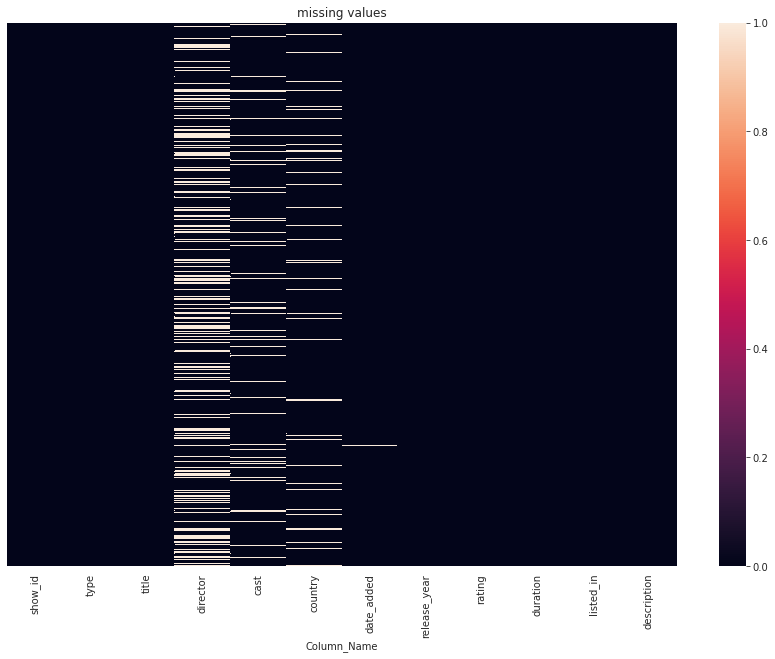

In [148]:
# ploting a heat map to know the null value
plt.figure(figsize=(15, 10))
sns.heatmap(data.isnull(), yticklabels=False)
plt.xlabel("Column_Name")
plt.title("missing values")
plt.show()

##<B>CHECKING THE DUPLICATE DATA POINTS IN DATASET:

In [149]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


<b>The data set contain contain 
* row = 7787
* column = 12
* Total data size = 93444
* except Release_year (int), all are contain object type data.

---



---
Datainspection:
* director is having  2389 null values which is 30.68 %
* cast is having  718 null values which is 9.22 %
* country is having  507 null values which is 6.51 %
* date_added is having  10 null values which is 0.13 %
* rating is having  7 null values which is 0.09 %

---



---
* date_added conatin catagorical data we ned to convert that into datetime data
* rating columns containg 15 unique value.





##<B>NULL VALUE TREATMENT

* RATING & COUNTRY - As rating column has 0.09% null values , so replacing nulls with mose frequent rating and doing same thing with country column

* CAST - cast column has too many different values and more than 9.22% are missing, so there is no need to keep it but we are keeping it to perform EDA

* DATE - there are few missing values for date column. so, lets so replacing nulls with mose frequent rating and doing same thing with country column

* DIRECTOR - Director column has more then 30% null values so replace null value with mode of that

In [151]:
# data['rating'].replace(np.nan, 'TV-MA',inplace  = True)
# data['country'].replace(np.nan, 'United States',inplace  = True)
# data['cast'].replace(np.nan, 'missing info',inplace  = True)
# data= data.drop(columns='director',axis=1)
data['rating'].fillna(data['rating'].mode()[0],inplace = True)
data['country'].fillna(data['country'].mode()[0],inplace = True)
data['cast'].fillna(data['cast'].mode()[0],inplace = True)
data['director'].fillna(data['director'].mode()[0],inplace = True)
data['date_added'].fillna(data['date_added'].mode()[0],inplace = True)

In [152]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##<b>DATE_ADDED COLUMNS SEPARATED INDIVIDUALLY:

In [153]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['day_added'] = data['date_added'].dt.day
data['year_added'] = data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month
data['year_added'].astype(int);
data['day_added'].astype(int);

In [154]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


In [155]:
##Classifying the data into categorical and numerical data
categorical_data = []
numerical_data = []
for col in data.columns:
    unique_values = len(data[col].unique())
    if unique_values < 30:
        categorical_data.append(col)
    else:
        numerical_data.append(col)

##<b>ANALYZE THE TYPE OF CONTENT AVAILABLE ON NETFLIX DATASET:

* Analysis entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.

In [181]:
data['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

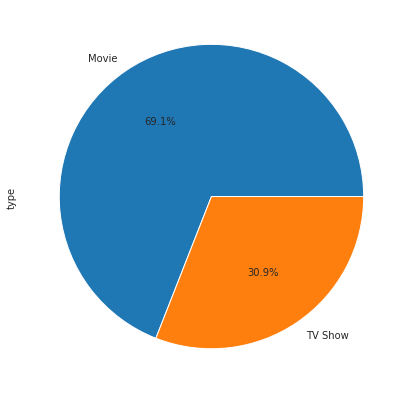

In [172]:
# Percentage of type present in our data set
sns.set_style('whitegrid')
plot = data['type'].value_counts().plot.pie(x ='TV Show', y = 'Movie' , autopct='%1.1f%%', figsize=(7,7))

###<B>Observations :-

* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 70% movies and 30% TV shows on Netflix.

In [173]:
import plotly.express as px
country = data['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

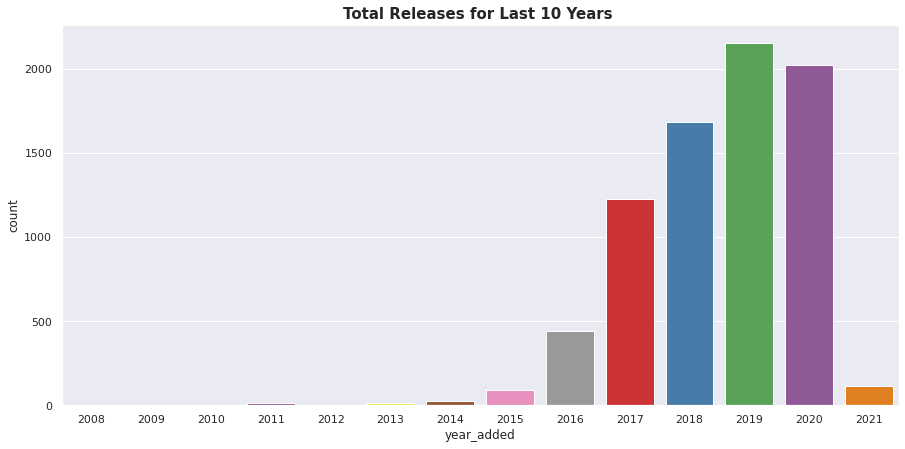

In [174]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=data,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

###<b>observation:
* The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19

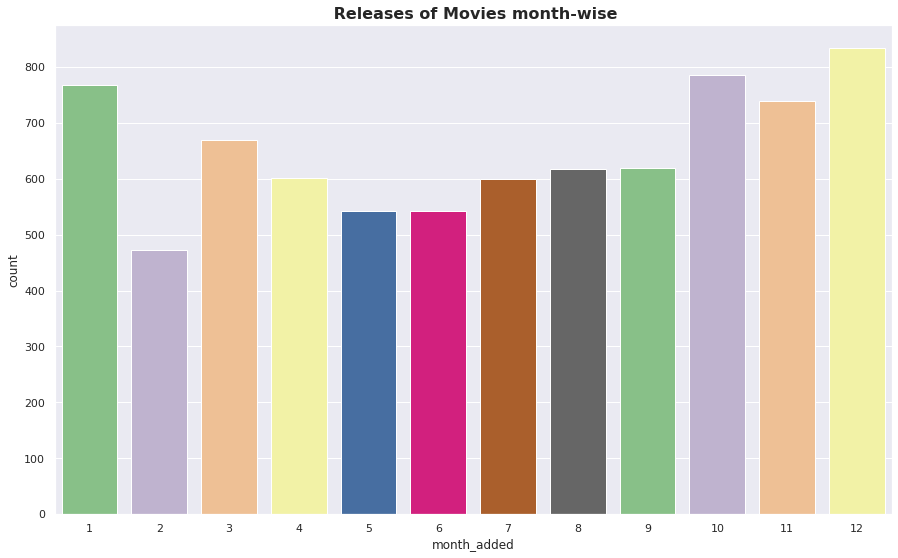

In [175]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=data,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

###<b>observation:
* More of the content is released in holiday season - October, November, December and January

In [157]:
booking_per_year = data.groupby('type')['rating'].value_counts().to_frame().unstack()
booking_per_year

rating                                                                 \
rating       G NC-17    NR     PG  PG-13      R   TV-14   TV-G   TV-MA  TV-PG   
type                                                                            
Movie     39.0   3.0  79.0  247.0  386.0  663.0  1272.0  111.0  1850.0  505.0   
TV Show    NaN   NaN   5.0    NaN    NaN    2.0   659.0   83.0  1020.0  301.0   

                                     
rating    TV-Y  TV-Y7 TV-Y7-FV   UR  
type                                 
Movie    117.0   95.0      5.0  5.0  
TV Show  163.0  176.0      1.0  NaN

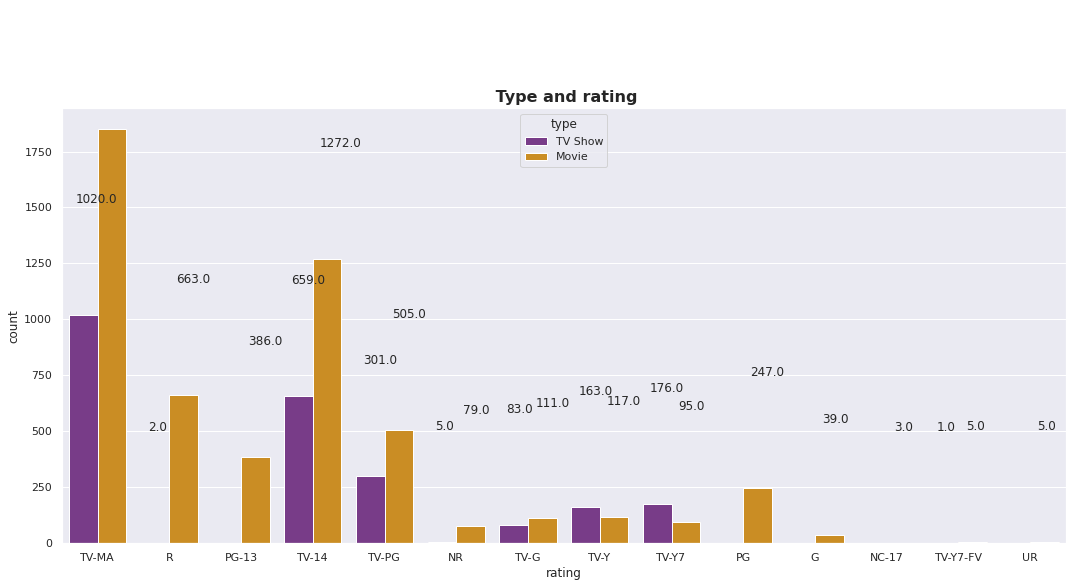

In [179]:
# type wise rating count
plt.figure(figsize=(18,8))
ax = sns.countplot(x='rating',hue='type',data=data,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

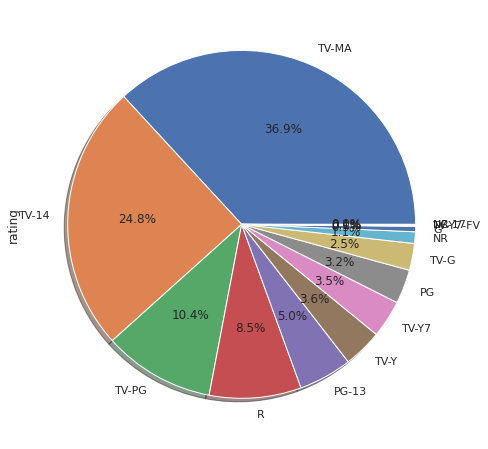

In [182]:
data['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

##<b>TOP GENRES ON NETFLIX:

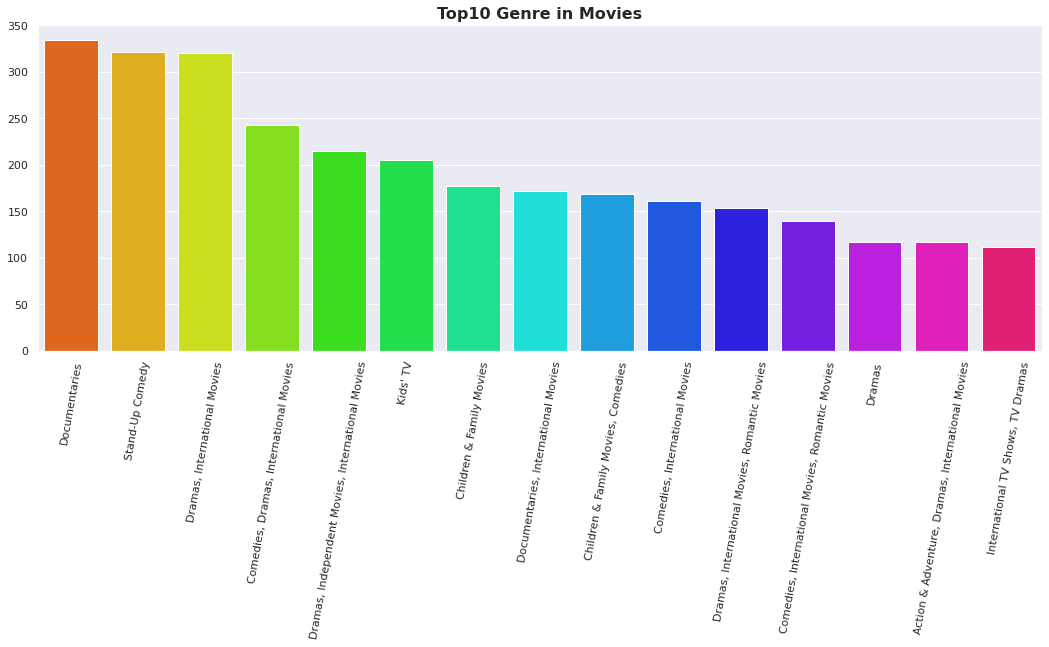

In [184]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = data["listed_in"].value_counts().head(15).index,
            y = data["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

###<b>Observation:
* From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies..

##<b>Top actors of netflix:

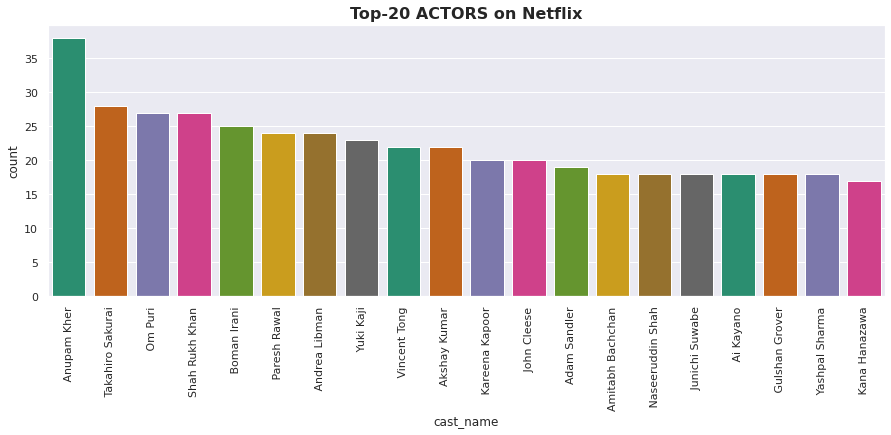

In [185]:
# Top 20 actors netflix
data['cast_name'] = data['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in data['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

###<b>Obesrvation:
* The top actor on Netflix Movies, based on the number of titles, is Anupam Kher

In [160]:
data.groupby("release_year")['type'].agg(['count']).iloc[:10]

,count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
1946,2
1947,1
1954,2
1955,3


In [161]:
data.groupby(["type"])["release_year"].agg(["max"])

,max
type,
Movie,2021
TV Show,2021
